In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [2]:
file_location = os.getcwd()

In [3]:
Jan_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJan.csv')
Feb_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainFeb.csv')
Mar_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainMar.csv')
Apr_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainApr.csv')
May_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainMay.csv')
Jun_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJun.csv')
Jul_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJul.csv')
Aug_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainAug.csv')
Sep_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainSep.csv')
Oct_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainOct.csv')
Nov_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainNov.csv')
Dec_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainDec.csv')

In [4]:
mainJan = pd.read_csv(Jan_path, encoding='cp949')
mainFeb = pd.read_csv(Feb_path, encoding='cp949')
mainMar = pd.read_csv(Mar_path, encoding='cp949')
mainApr = pd.read_csv(Apr_path, encoding='cp949')
mainMay = pd.read_csv(May_path, encoding='cp949')
mainJun = pd.read_csv(Jun_path, encoding='cp949')
mainJul = pd.read_csv(Jul_path, encoding='cp949')
mainAug = pd.read_csv(Aug_path, encoding='cp949')
mainSep = pd.read_csv(Sep_path, encoding='cp949')
mainOct = pd.read_csv(Oct_path, encoding='cp949')
mainNov = pd.read_csv(Nov_path, encoding='cp949')
mainDec = pd.read_csv(Dec_path, encoding='cp949')

In [5]:
month = [mainJan, mainFeb, mainMar, mainApr, mainMay,
        mainJun, mainJul, mainAug, mainSep, mainOct,
        mainNov, mainDec]

for i in month:
    i['가변수'] = i['총_사용인원'].notnull().astype(int)

In [6]:
sum_data = month[0]

for i in month[1:] :
    sum_data['총_사용인원'] += i['총_사용인원']
    sum_data['평균_사용인원'] += i['평균_사용인원']
    sum_data['가변수'] += i['가변수']

In [7]:
sum_data['평균_사용인원'] = sum_data['평균_사용인원']/sum_data['가변수']

In [8]:
total_data = pd.read_csv('emotion_anomaly_detection.csv', encoding='cp949')
total_data = total_data.merge(sum_data[['대여소_ID', '총_사용인원', '평균_사용인원']], on='대여소_ID', how='left')

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
total_data['동'] = le.fit_transform(total_data['동'])

In [10]:
total_data = total_data.dropna(subset=['총_사용인원'])

In [11]:
total_data.to_csv('result_data_file.csv', index=False, encoding='cp949')

In [12]:
X = total_data[['500m내_대여소가중치','500m내_버스정류소가중치',
                '500m내_지하철역가중치','500m내_교차로가중치',
                '500m내_자전거보관소가중치','500m내_자전거도로가중치',
                '500m내_고등학교가중치','500m내_대학교가중치',
                '500m내_사고건수_가중치','동','500m내_관광지_여부', 
                '500m내_휴게음식점가중치']]
Y = total_data['평균_사용인원'] 

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=300)

선형 회귀 분석

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [71]:
linear_pred = linear_model.predict(X_test)

In [72]:
linear_spuared = mean_squared_error(Y_test, linear_pred)
linear_absolute = mean_absolute_error(Y_test, linear_pred)
linear_r2_score = r2_score(Y_test, linear_pred)

랜덤 포레스트

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
randomf_model = RandomForestRegressor(n_estimators=100, random_state=300)
randomf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=300)

In [75]:
randomf_pred = randomf_model.predict(X_test)

In [76]:
randomf_spuared = mean_squared_error(Y_test, randomf_pred)
randomf_absolute = mean_absolute_error(Y_test, randomf_pred)
randomf_r2_score = r2_score(Y_test, randomf_pred)

XGBoost Regressor

In [77]:
!pip install xgboost
from xgboost import XGBRegressor

In [78]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=300)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [79]:
xgb_pred = xgb_model.predict(X_test)

In [80]:
xgb_spuared = mean_squared_error(Y_test, xgb_pred)
xgb_absolute = mean_absolute_error(Y_test, xgb_pred)
xgb_r2_score = r2_score(Y_test, xgb_pred)

Lasso 기반 특성 선택

In [81]:
from sklearn.linear_model import LassoCV

In [82]:
lasso_model = LassoCV(cv=5, random_state=300)
lasso_model.fit(X_train, Y_train)

LassoCV(cv=5, random_state=300)

In [83]:
lasso_pred = lasso_model.predict(X_test)

In [84]:
lasso_spuared = mean_squared_error(Y_test, lasso_pred)
lasso_absolute = mean_absolute_error(Y_test, lasso_pred)
lasso_r2_score = r2_score(Y_test, lasso_pred)

Ridge Regression

In [85]:
from sklearn.linear_model import Ridge

In [86]:
ridge_model = Ridge(alpha=1.0, random_state=300)
ridge_model.fit(X_train, Y_train)

Ridge(random_state=300)

In [87]:
ridge_pred = ridge_model.predict(X_test)

In [88]:
ridge_spuared = mean_squared_error(Y_test, ridge_pred)
ridge_absolute = mean_absolute_error(Y_test, ridge_pred)
ridge_r2_score = r2_score(Y_test, ridge_pred)

ElasticNet

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [90]:
elan_model = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=300))
elan_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(random_state=300))])

In [91]:
elan_pred = elan_model.predict(X_test)

In [92]:
elan_spuared = mean_squared_error(Y_test, elan_pred)
elan_absolute = mean_absolute_error(Y_test, elan_pred)
elan_r2_score = r2_score(Y_test, elan_pred)

KNN Regressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [94]:
KNN_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
KNN_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [95]:
KNN_pred = KNN_model.predict(X_test)

In [96]:
KNN_spuared = mean_squared_error(Y_test, KNN_pred)
KNN_absolute = mean_absolute_error(Y_test, KNN_pred)
KNN_r2_score = r2_score(Y_test, KNN_pred)

In [97]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mean Squared Error of Various Regression Models')

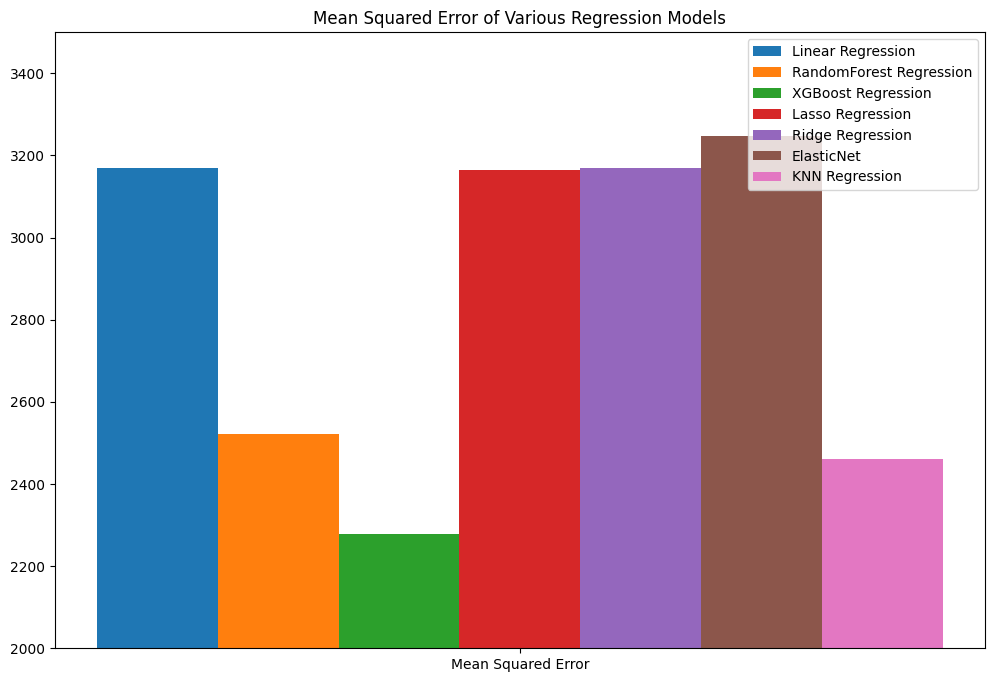

In [59]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Squared Error"]

linear_y = [linear_spuared]
randomf_y = [randomf_spuared]
xgb_y = [xgb_spuared]
lasso_y = [lasso_spuared]
ridge_y = [ridge_spuared]
elan_y = [elan_spuared]
KNN_y = [KNN_spuared]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(2000, 3500)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Squared Error of Various Regression Models')

In [98]:
print(randomf_y)

[0.33536968837013725]


Text(0.5, 1.0, 'Mean Absolute Error of Various Regression Models')

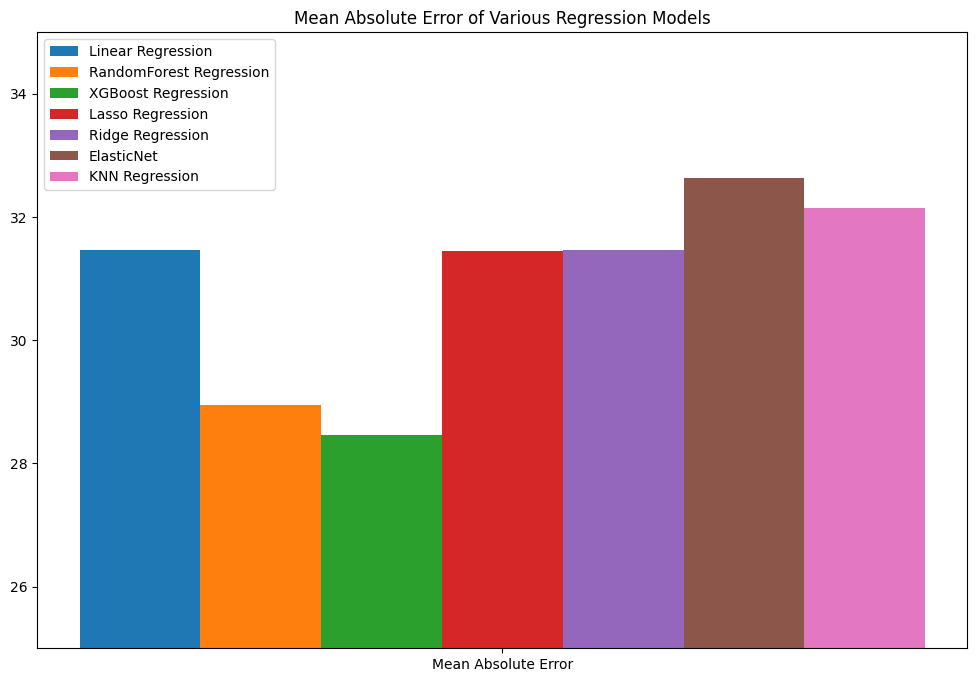

In [99]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Absolute Error"]

linear_y = [linear_absolute]
randomf_y = [randomf_absolute]
xgb_y = [xgb_absolute]
lasso_y = [lasso_absolute]
ridge_y = [ridge_absolute]
elan_y = [elan_absolute]
KNN_y = [KNN_absolute]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(25, 35)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Absolute Error of Various Regression Models')

In [100]:
print(randomf_y)

[28.949001694067658]


Text(0.5, 1.0, 'R2 Score of Various Regression Models')

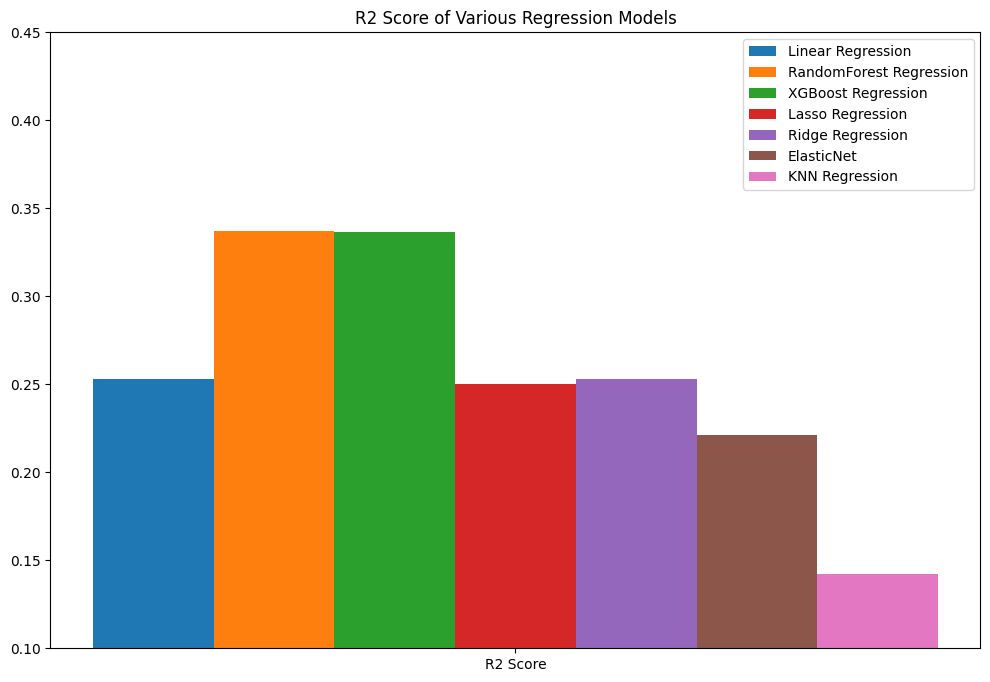

In [101]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["R2 Score"]

linear_y = [linear_r2_score]
randomf_y = [randomf_r2_score]
xgb_y = [xgb_r2_score]
lasso_y = [lasso_r2_score]
ridge_y = [ridge_r2_score]
elan_y = [elan_r2_score]
KNN_y = [KNN_r2_score]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(0.1, 0.45)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('R2 Score of Various Regression Models')

In [63]:
print(randomf_y)

[0.33536968837013725]


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
radomf_g_model = RandomForestRegressor(random_state=300)

In [104]:
parameter = {
    'n_estimators': [100, 300, 500],  
    'max_depth': [None, 6, 12],       
    'min_samples_split': [2, 5],      
    'min_samples_leaf': [1, 2],       
    'max_features': [1.0, 'sqrt', 0.8],  
    'criterion': ['squared_error', 'absolute_error']
}

In [105]:
grid_search = GridSearchCV(
    estimator=radomf_g_model,
    param_grid=parameter,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [106]:
tuning_model = make_pipeline(StandardScaler(), grid_search)
tuning_model.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=300),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error',
                                                        'absolute_error'],
                                          'max_depth': [None, 6, 12],
                                          'max_features': [1.0, 'sqrt', 0.8],
                                          'min_samples_leaf': [1, 2],
                                          'min_samples_split': [2, 5],
                                          'n_estimators': [100, 300, 500]},
                              scoring='r2', verbose=1))])

In [107]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [109]:
tuning_pred = tuning_model.predict(X_test)

In [110]:
tuning_spuared = mean_squared_error(Y_test, tuning_pred)
tuning_absolute = mean_absolute_error(Y_test, tuning_pred)
tuning_r2_score = r2_score(Y_test, tuning_pred)

In [111]:
print(tuning_spuared)
print(tuning_absolute)
print(tuning_r2_score)

1571.1536384126996
28.39844964110118
0.3540069257739258


In [113]:
randomf_new_model = RandomForestRegressor(
    criterion='absolute_error',
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=300
)

In [114]:
randomf_new_model.fit(X_train, Y_train)

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=300, random_state=300)

In [115]:
importances = randomf_new_model.feature_importances_

feature_importance = list(zip(X_train.columns, importances))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

500m내_사고건수_가중치: 0.1688
500m내_휴게음식점가중치: 0.1302
500m내_교차로가중치: 0.1109
500m내_대여소가중치: 0.1035
500m내_버스정류소가중치: 0.0960
500m내_자전거도로가중치: 0.0953
동: 0.0867
500m내_지하철역가중치: 0.0767
500m내_자전거보관소가중치: 0.0682
500m내_고등학교가중치: 0.0418
500m내_관광지_여부: 0.0111
500m내_대학교가중치: 0.0107


In [116]:
X_train_new = X_train.drop(columns=['500m내_대학교가중치'])
X_test_new = X_test.drop(columns=['500m내_대학교가중치'])
randomf_new_model.fit(X_train_new, Y_train)

randomf_new_pred = randomf_new_model.predict(X_test_new)

randomf_new_spuared = mean_squared_error(Y_test, randomf_new_pred)
randomf_new_absolute = mean_absolute_error(Y_test, randomf_new_pred)
randomf_new_r2_score = r2_score(Y_test, randomf_new_pred)

print(randomf_new_spuared)
print(randomf_new_absolute)
print(randomf_new_r2_score)


1574.8748700844494
28.372579192034266
0.3524769099761266


In [ ]:
X_train_new = X_train.drop(columns=['500m내_대학교가중치','500m내_관광지_여부'])
X_test_new = X_test.drop(columns=['500m내_대학교가중치','500m내_관광지_여부'])
randomf_new_model.fit(X_train_new, Y_train)

randomf_new_pred = randomf_new_model.predict(X_test_new)

randomf_new_spuared = mean_squared_error(Y_test, randomf_new_pred)
randomf_new_absolute = mean_absolute_error(Y_test, randomf_new_pred)
randomf_new_r2_score = r2_score(Y_test, randomf_new_pred)

print(randomf_new_spuared)
print(randomf_new_absolute)
print(randomf_new_r2_score)

3096.7261072867695
32.59642857564947
0.35185730916249836
